In [ ]:
#1.identify
#2.find strings n edit distance away:
#3.filter candidates
#4.calculate probability(choose the largest one)

In [ ]:
#############build the vocab to identify 

In [16]:
# imports
import re # regular expression library; for tokenization of words
from collections import Counter # collections library; counter: dict subclass for counting hashable objects
import matplotlib.pyplot as plt # for data visualization

In [2]:
# the tiny corpus of text ! 
text = 'red pink pink blue blue yellow ORANGE BLUE BLUE PINK' # 🌈
print(text)
print('string length : ',len(text))

red pink pink blue blue yellow ORANGE BLUE BLUE PINK
string length :  52


In [4]:
#Preprocessing
# convert all letters to lower case
text_lowercase = text.lower()
print(text_lowercase)
# some regex to tokenize the string to words and return them in a list
words = re.findall(r'\w+', text_lowercase)
print(words)

red pink pink blue blue yellow orange blue blue pink
['red', 'pink', 'pink', 'blue', 'blue', 'yellow', 'orange', 'blue', 'blue', 'pink']


In [17]:
#Create Vocabulary
vocab = set(words)
print(vocab)
print('count : ',len(vocab))

{'red', 'orange', 'blue', 'pink', 'yellow'}
count :  5


In [27]:
count_a = Counter(words)
print(count_a)
print('count : ',len(count_a))

Counter({'blue': 4, 'pink': 3, 'red': 1, 'yellow': 1, 'orange': 1})
count :  5


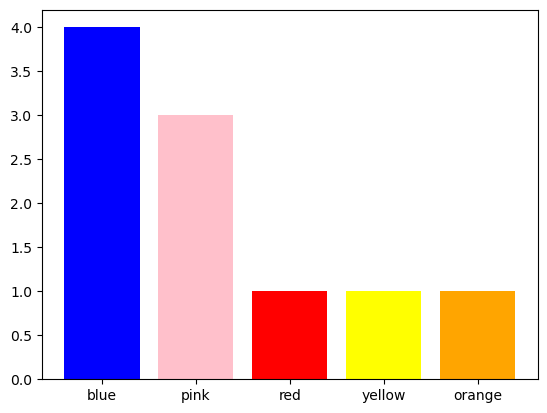

In [28]:
# bar chart of sorted word counts
d = {'blue': count_a['blue'], 'pink': count_a['pink'], 'red': count_a['red'], 'yellow': count_a['yellow'], 'orange': count_a['orange']}
plt.bar(range(len(d)), list(d.values()), align='center', color=d.keys())
_ = plt.xticks(range(len(d)), list(d.keys()))

In [29]:
count_a.update(Counter({'purple': 2}))
print(count_a)

Counter({'blue': 4, 'pink': 3, 'purple': 2, 'red': 1, 'yellow': 1, 'orange': 1})


In [ ]:
###############

In [ ]:
####################step2. edit strings
#insert/delete/switch/replace

In [31]:
# data
word = 'dearz' # 🦌

In [32]:
# splits with a loop
splits_a = []
for i in range(len(word)+1):
    splits_a.append([word[:i],word[i:]])

for i in splits_a:
    print(i)

['', 'dearz']
['d', 'earz']
['de', 'arz']
['dea', 'rz']
['dear', 'z']
['dearz', '']


In [33]:
# same splits, done using a list comprehension
splits_b = [(word[:i], word[i:]) for i in range(len(word) + 1)]

for i in splits_b:
    print(i)

('', 'dearz')
('d', 'earz')
('de', 'arz')
('dea', 'rz')
('dear', 'z')
('dearz', '')


In [34]:
#delete
splits = splits_a
deletes = []
print('word : ', word)

for L,R in splits:
    if R:
        print(L + R[1:], ' <-- delete ', R[0])

word :  dearz
earz  <-- delete  d
darz  <-- delete  e
derz  <-- delete  a
deaz  <-- delete  r
dear  <-- delete  z


In [37]:
# breaking it down
print('word : ', word)
one_split = splits[2]
print('first item from the splits list : ', one_split)
L = one_split[0]
R = one_split[1]
print('L : ', L)
print('R : ', R)
print('*** now implicit delete by excluding the leading letter ***')
print('L + R[1:] : ',L + R[1:], ' <-- delete ', R[0])

word :  dearz
first item from the splits list :  ['de', 'arz']
L :  de
R :  arz
*** now implicit delete by excluding the leading letter ***
L + R[1:] :  derz  <-- delete  a


In [ ]:
########always delete R[0] the first character of R

In [39]:
# deletes with a list comprehension
splits = splits_a
deletes = [L + R[1:] for L, R in splits if R]
print(deletes)

['earz', 'darz', 'derz', 'deaz', 'dear']


In [44]:
vocab = ['dean','deer','dear','fries','and','coke']
edits = list(deletes)

print('vocab : ', vocab)
print('edits : ', edits)

candidates=set(vocab).intersection(edits)

### START CODE HERE ###
#candidates = ??  # hint: 'set.intersection'
### END CODE HERE ###

print('candidate words : ', candidates)

vocab :  ['dean', 'deer', 'dear', 'fries', 'and', 'coke']
edits :  ['earz', 'darz', 'derz', 'deaz', 'dear']
candidate words :  {'dear'}


In [ ]:
#####################################################

In [ ]:
##############